# **Title of ML project: IPL Data Analysis**
—--------------------------------------------------------------

**Name:** [HASHIL P]

**Organization:** Entri Elevate

**Date:** [03-06-2024]



# **Objective:**
To analyze player performance and identify key players for team selection and strategy formulation in the upcoming IPL season.


#  **Overview of Problem Statement:**


The Indian Premier League (IPL) is one of the most popular and competitive cricket leagues in the world. 
With numerous matches played each season, a wealth of data is generated, encompassing player performances, team statistics, match outcomes, 
and more. The problem statement involves leveraging this extensive data to derive meaningful insights that can aid various stakeholders,
such as team managers, coaches, players, analysts, broadcasters, and fans.

 # **Data Description:**
   - Source: Cricsheet
   - Features: [id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2]



In [197]:
pip install warning


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warning (from versions: none)
ERROR: No matching distribution found for warning

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [378]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Your code here

# Optionally, you can reset the warning filters later if needed
# warnings.resetwarnings()


# **Data Collection:**

In [379]:
import warnings  # Corrected import statement

# Your other import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#DATA LOADING

In [380]:
df = pd.read_csv("D:\\New folder\\archive (11)\\matches.csv")

#DATA EXPLORATION 

In [381]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [382]:
#shape
df.shape

(1024, 20)

In [383]:
#Display the data types, non-null counts, and memory usage, 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           1024 non-null   object 
 2   city             973 non-null    object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  method        

In [384]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [385]:
#find missing value
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1003
umpire1               0
umpire2               0
dtype: int64

# **Data Preprocessing - Data Cleaning:**


In [386]:
#drop the colum
df.drop(['id','season','city', 'date', 'match_type', 'player_of_match', 'venue', 'result_margin', 'super_over', 'method', 'umpire1', 'umpire2'], axis=1, inplace=True)


In [387]:
df.columns

Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'target_runs', 'target_overs'],
      dtype='object')

In [388]:
#find missing value
df.isnull().sum()

team1            0
team2            0
toss_winner      0
toss_decision    0
winner           5
result           0
target_runs      3
target_overs     3
dtype: int64

In [389]:
df['winner'] = df['winner'].fillna(df['winner'].mode()[0])
df['target_runs'] = df['target_runs'].fillna(df['target_runs'].mean())
df['target_overs'] = df['target_overs'].fillna(df['target_overs'].mean())



In [390]:
#find missing value
df.isnull().sum()

team1            0
team2            0
toss_winner      0
toss_decision    0
winner           0
result           0
target_runs      0
target_overs     0
dtype: int64

In [391]:
# identify categorical columns
categorical_columns=df.select_dtypes(include=["object","category"]).columns.tolist()
categorical_columns

['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result']

In [392]:
df

,team1,team2,toss_winner,toss_decision,winner,result,target_runs,target_overs
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,223.0,20.0
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,241.0,20.0
2,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,130.0,20.0
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,166.0,20.0
4,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,111.0,20.0
...,...,...,...,...,...,...,...,...
1019,Royal Challengers Bangalore,Gujarat Titans,Gujarat Titans,field,Gujarat Titans,wickets,198.0,20.0
1020,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,Chennai Super Kings,runs,173.0,20.0
1021,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,Mumbai Indians,runs,183.0,20.0
1022,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,Gujarat Titans,runs,234.0,20.0


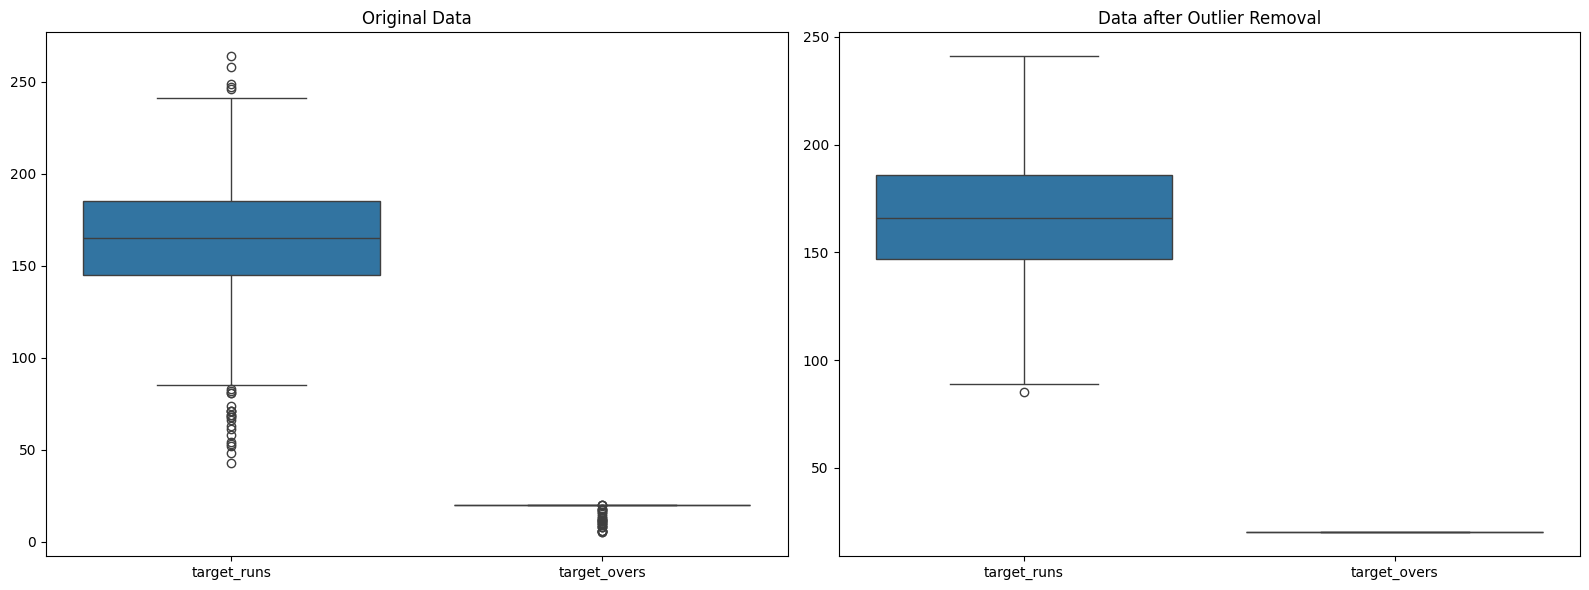

In [394]:


# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    if column in df.columns and pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Assuming df is your DataFrame
# Make sure to define df2 before using it
# df= ...

check_columns = ['team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'target_runs', 'target_overs']

# Create box plot for each column before removing outliers
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[check_columns])
plt.title('Original Data')

# Remove outliers from the DataFrame
df= df.copy()
for column in check_columns:
    df= remove_outliers_iqr(df, column)

# Create box plots for the cleaned data
plt.subplot(1, 2, 2)
sns.boxplot(data=df[check_columns])
plt.title('Data after Outlier Removal')

plt.tight_layout()
plt.show()



In [395]:

from scipy.stats import skew

# Assuming your data is loaded into a pandas DataFrame called 'df'
# Replace 'target_runs' and 'target_overs' with the actual column names in your DataFrame

# Calculate skewness for 'target_runs' column
skewness_runs = skew(df['target_runs'])

# Calculate skewness for 'target_overs' column
skewness_overs = skew(df['target_overs'])

print("Skewness of 'target_runs' column:", skewness_runs)
print("Skewness of 'target_overs' column:", skewness_overs)


Skewness of 'target_runs' column: -0.04142343213712586
Skewness of 'target_overs' column: nan


# **Exploratory Data Analysis (EDA):**


# DATA VISUALIZATION 

In [396]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# HISTOGRAM 

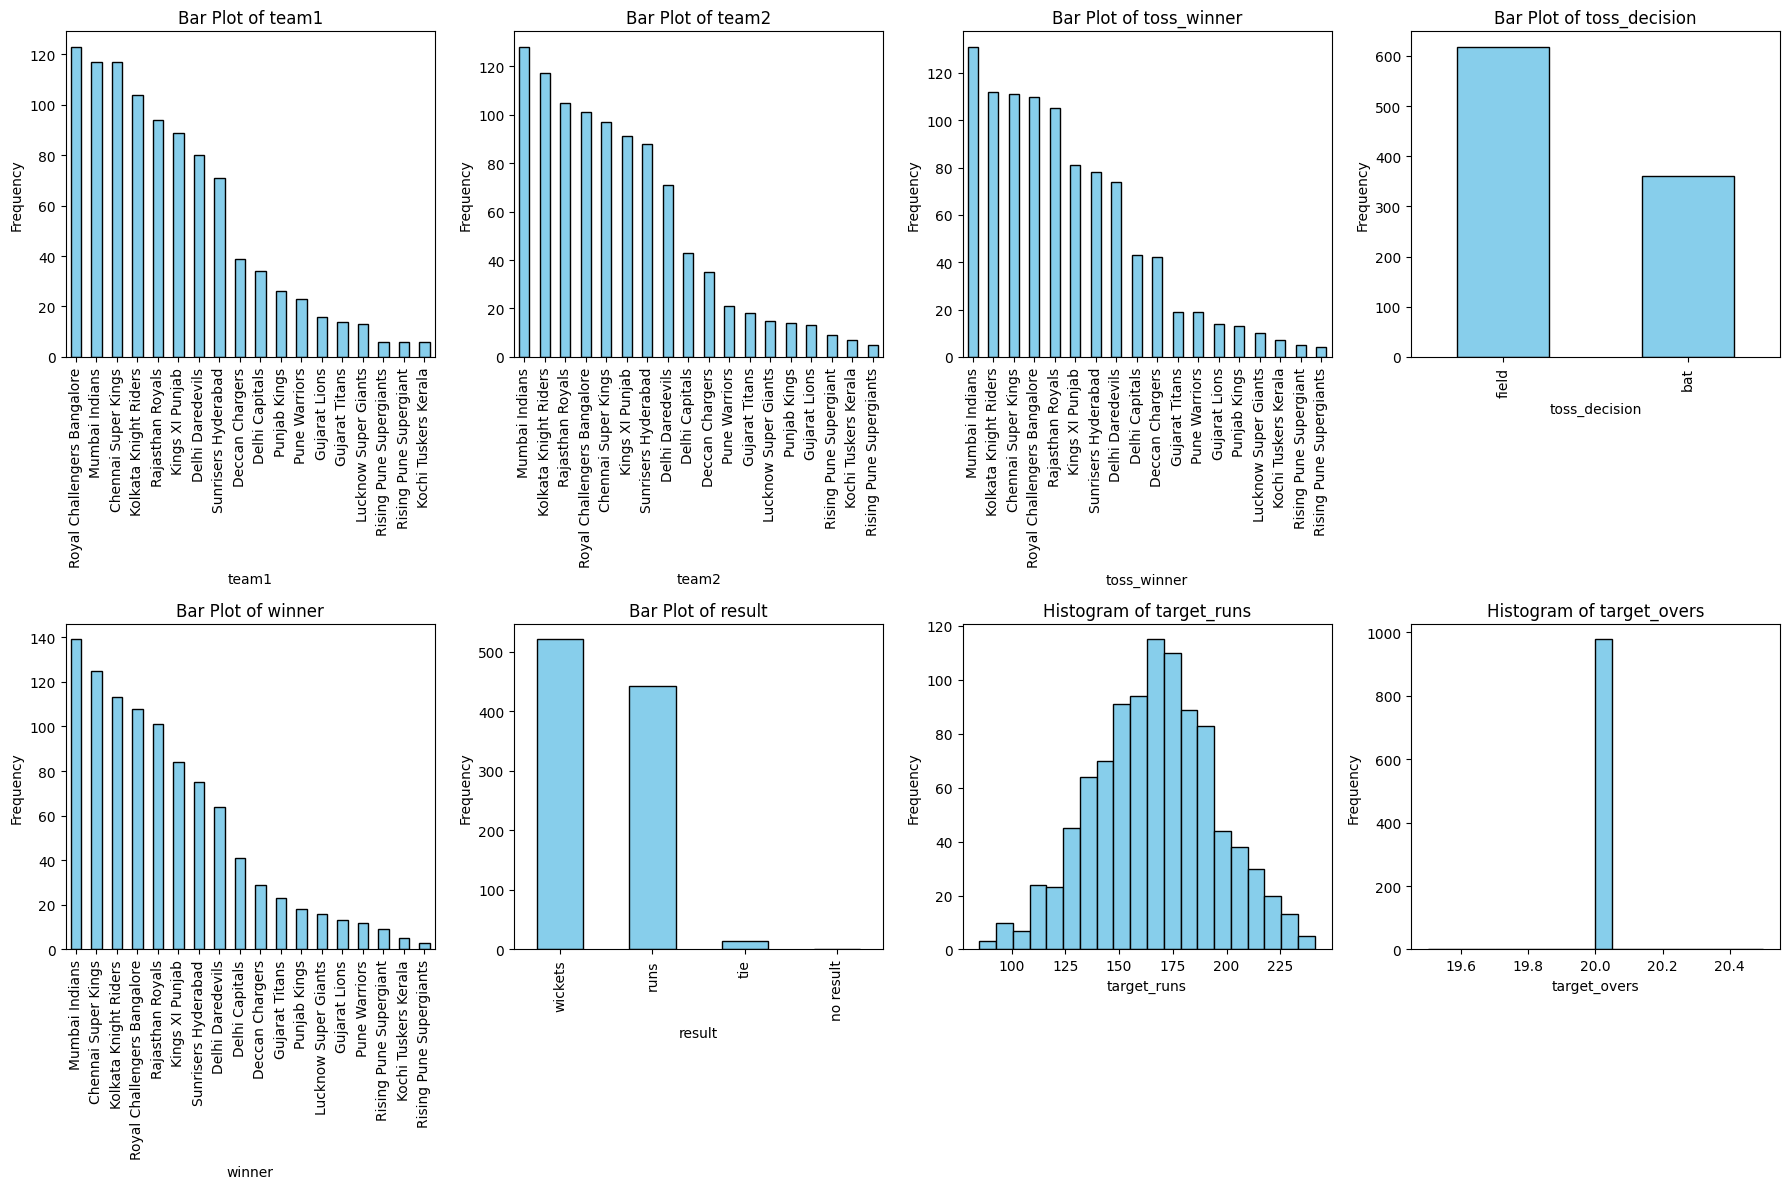

In [398]:
# Histogram for each numerical column
df = pd.DataFrame(df)

# Create histograms for each column
plt.figure(figsize=(18, 12))
for i, column in enumerate(df.columns):
    plt.subplot(2, len(df.columns)//2, i+1)
    if df[column].dtype == 'object':  # Categorical column
        df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Plot of {column}')
    else:  # Numerical column
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



# PIE CHART

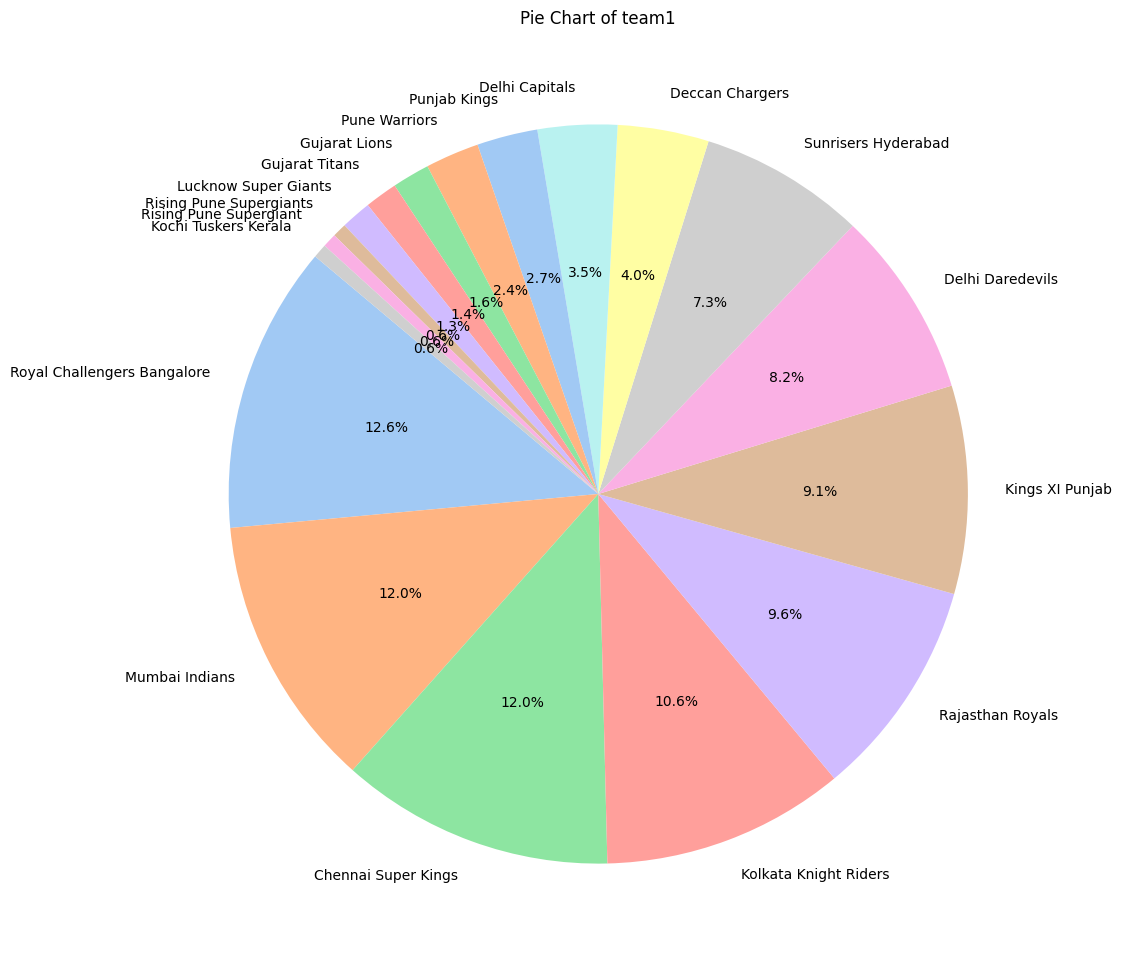

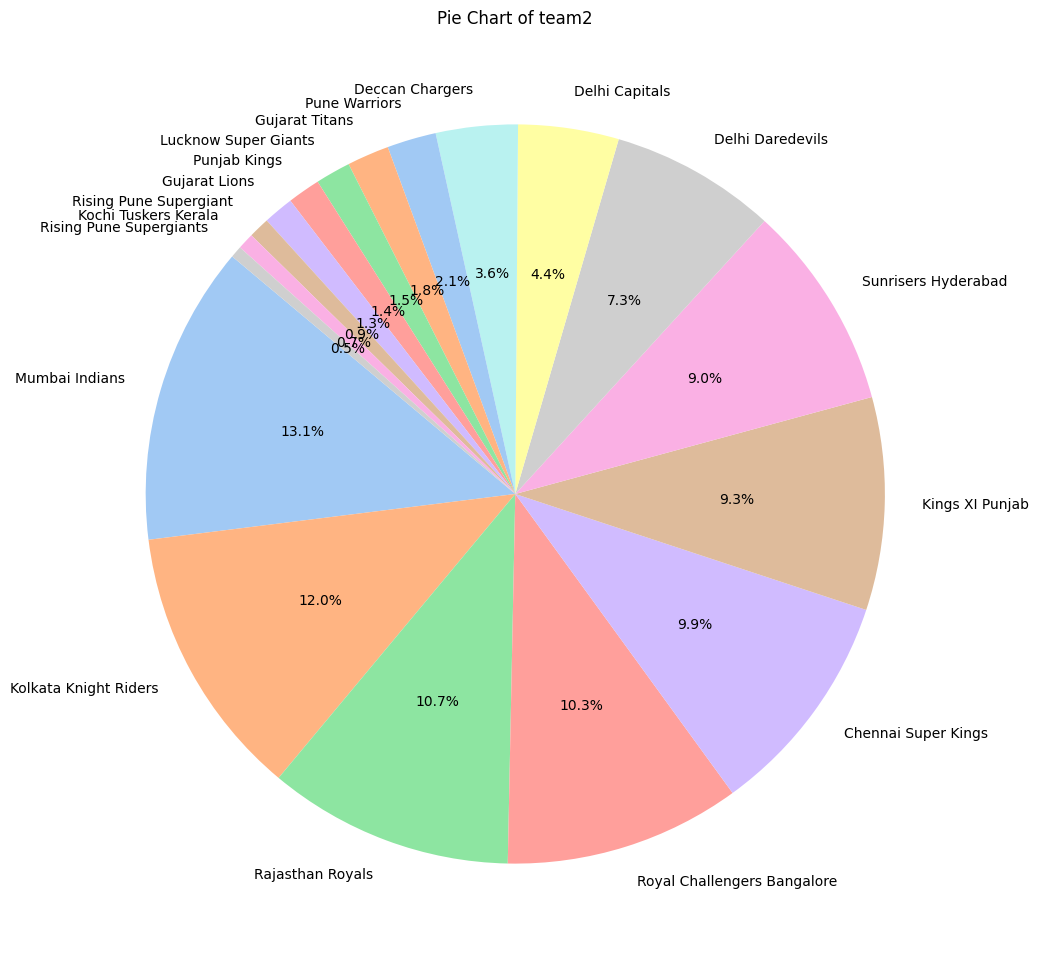

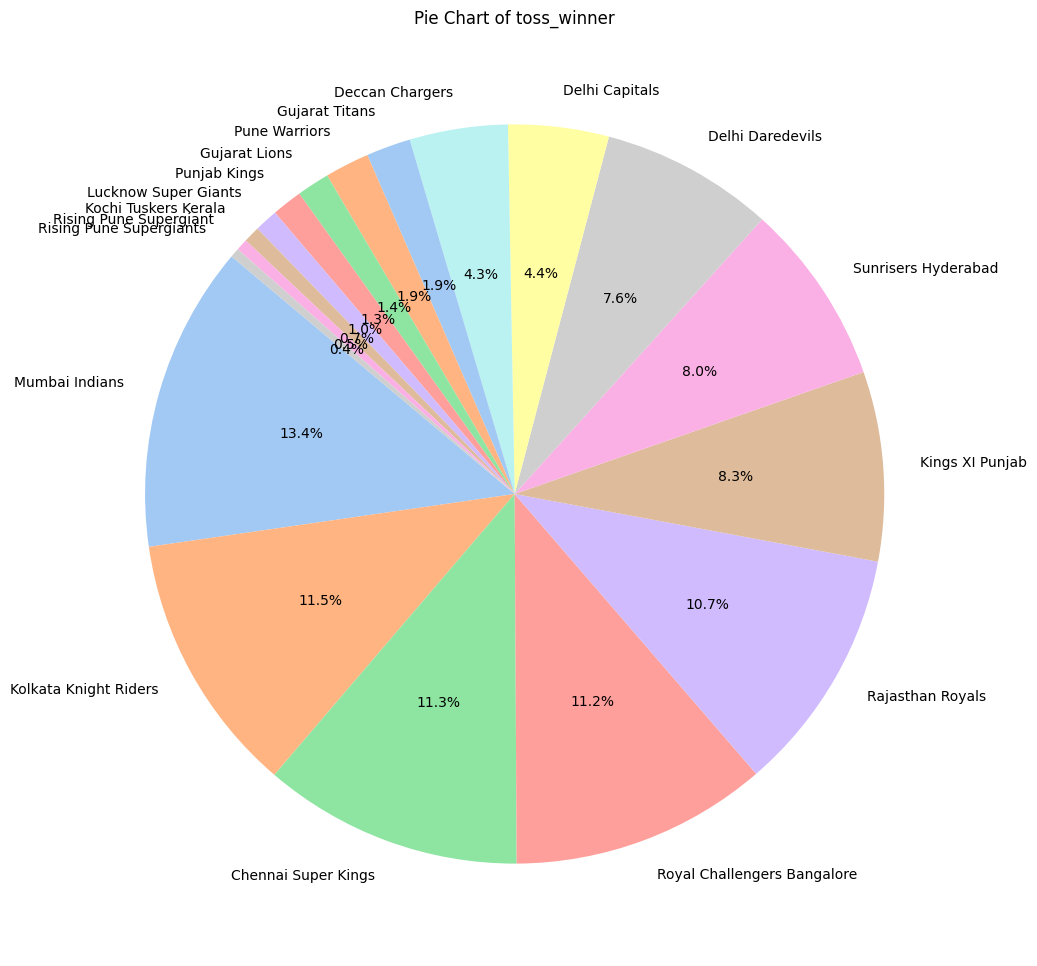

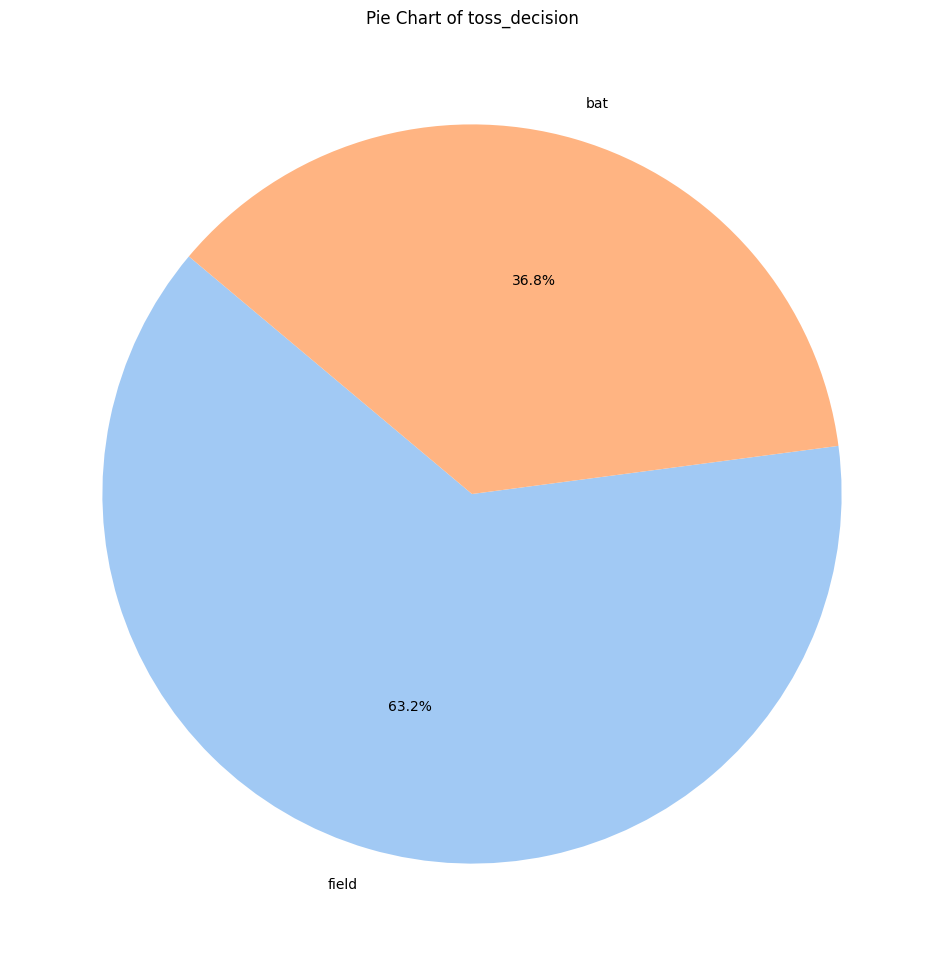

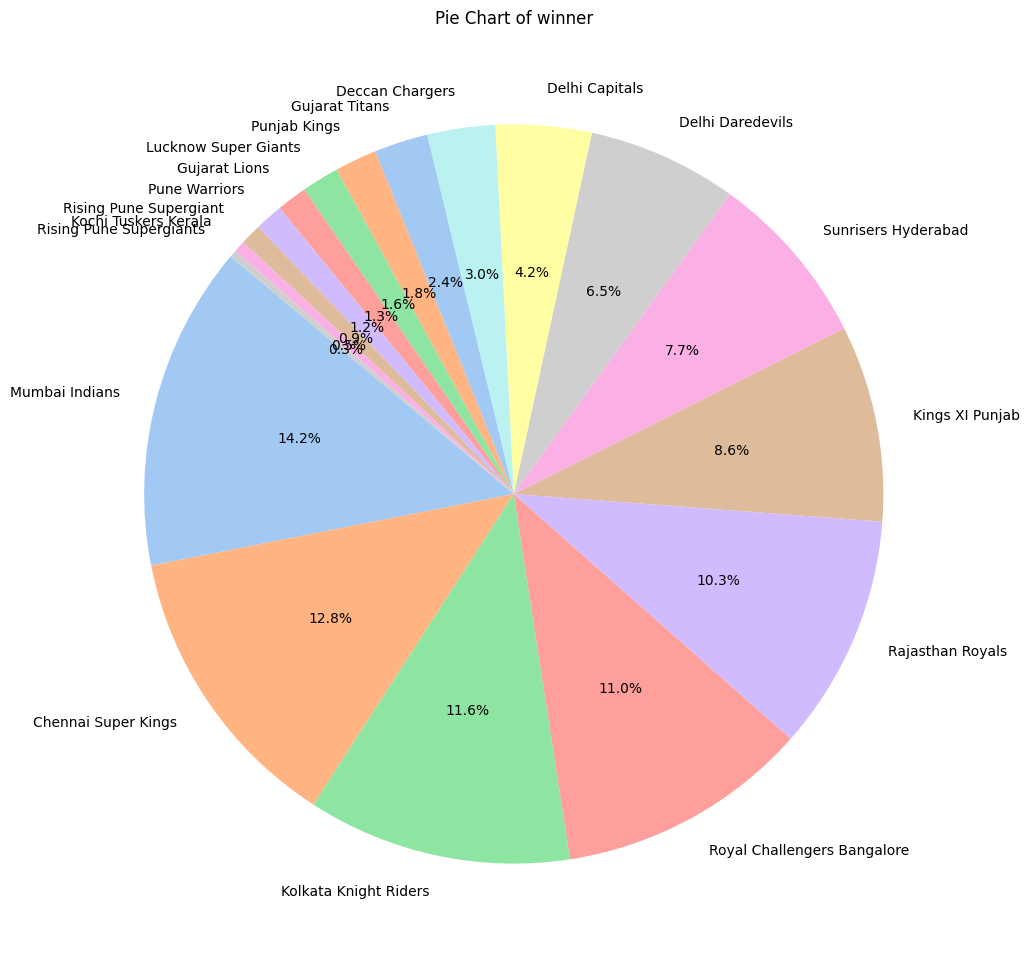

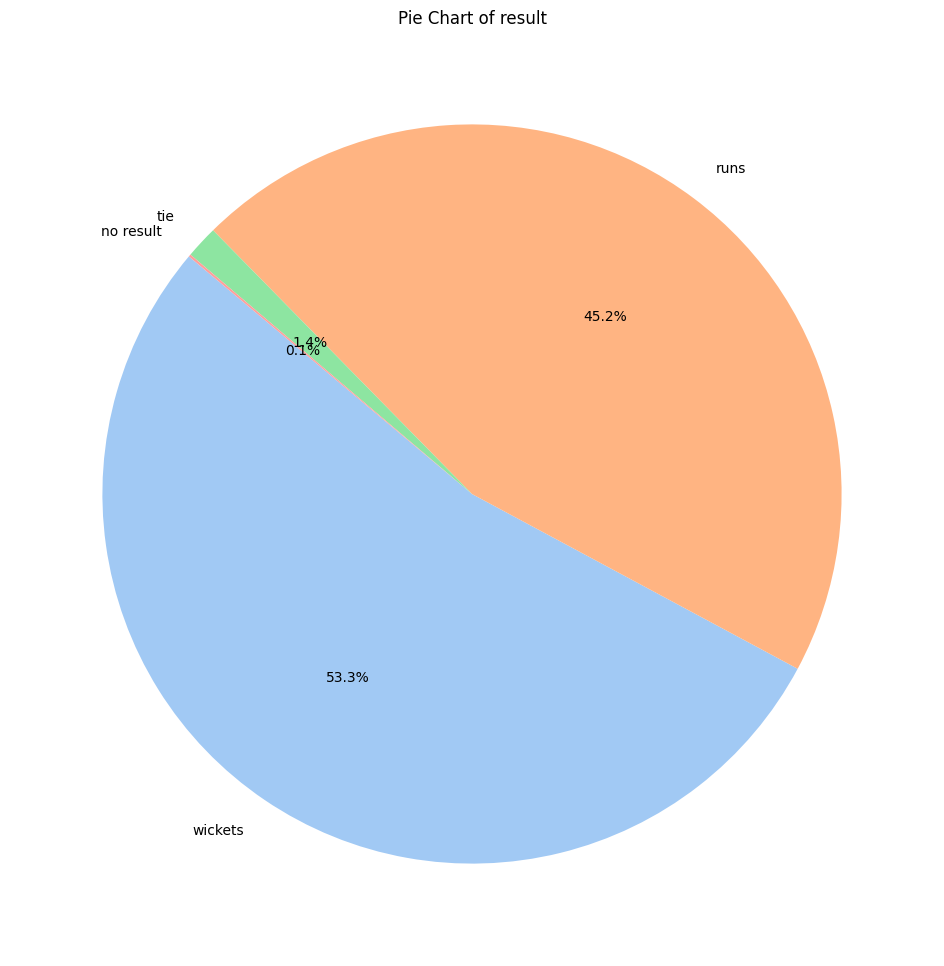

In [399]:
df = pd.DataFrame(df)

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create pie chart for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(16, 12))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')
    plt.show()

# COUNT PLOT

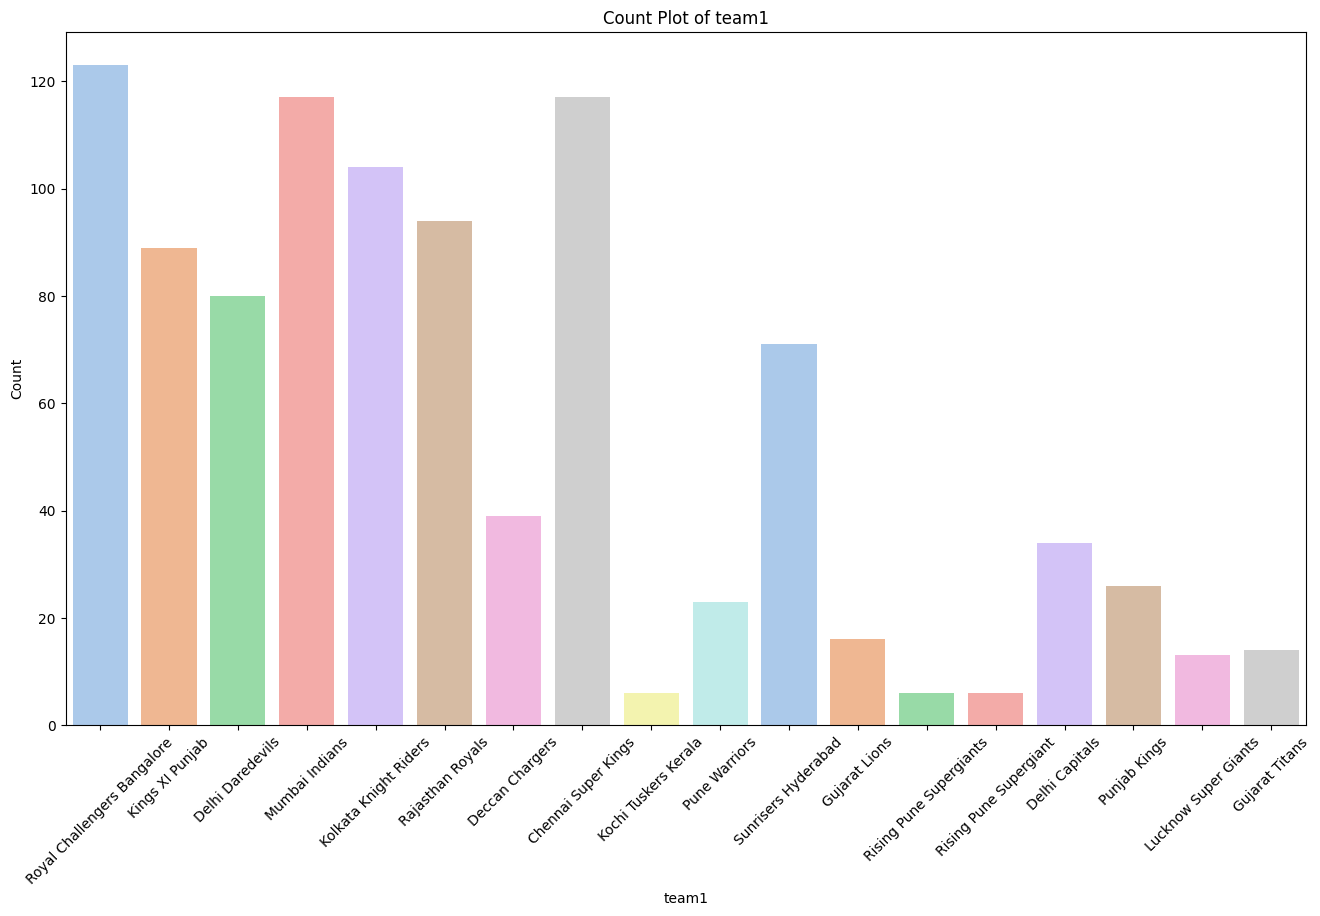

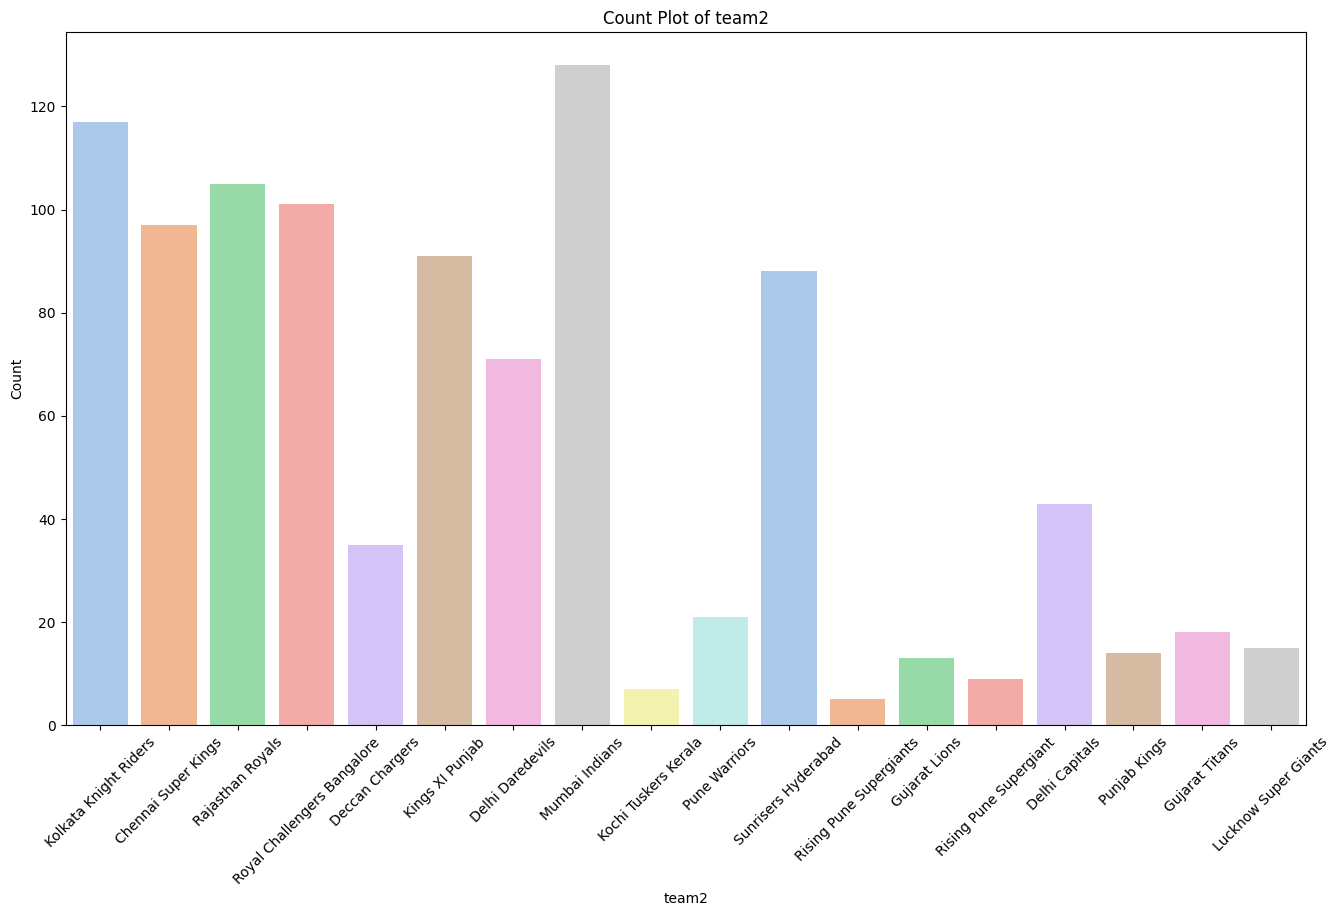

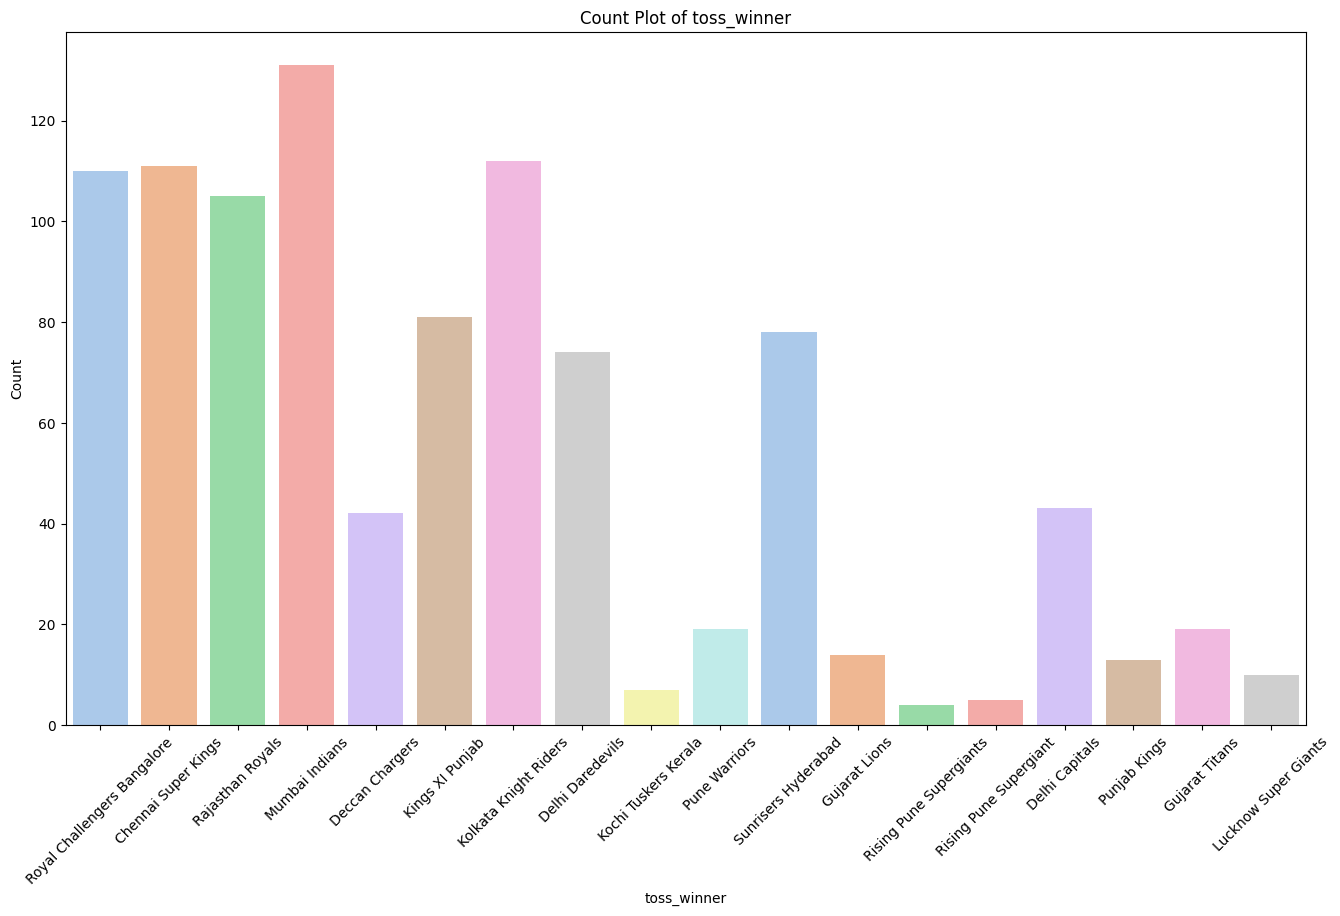

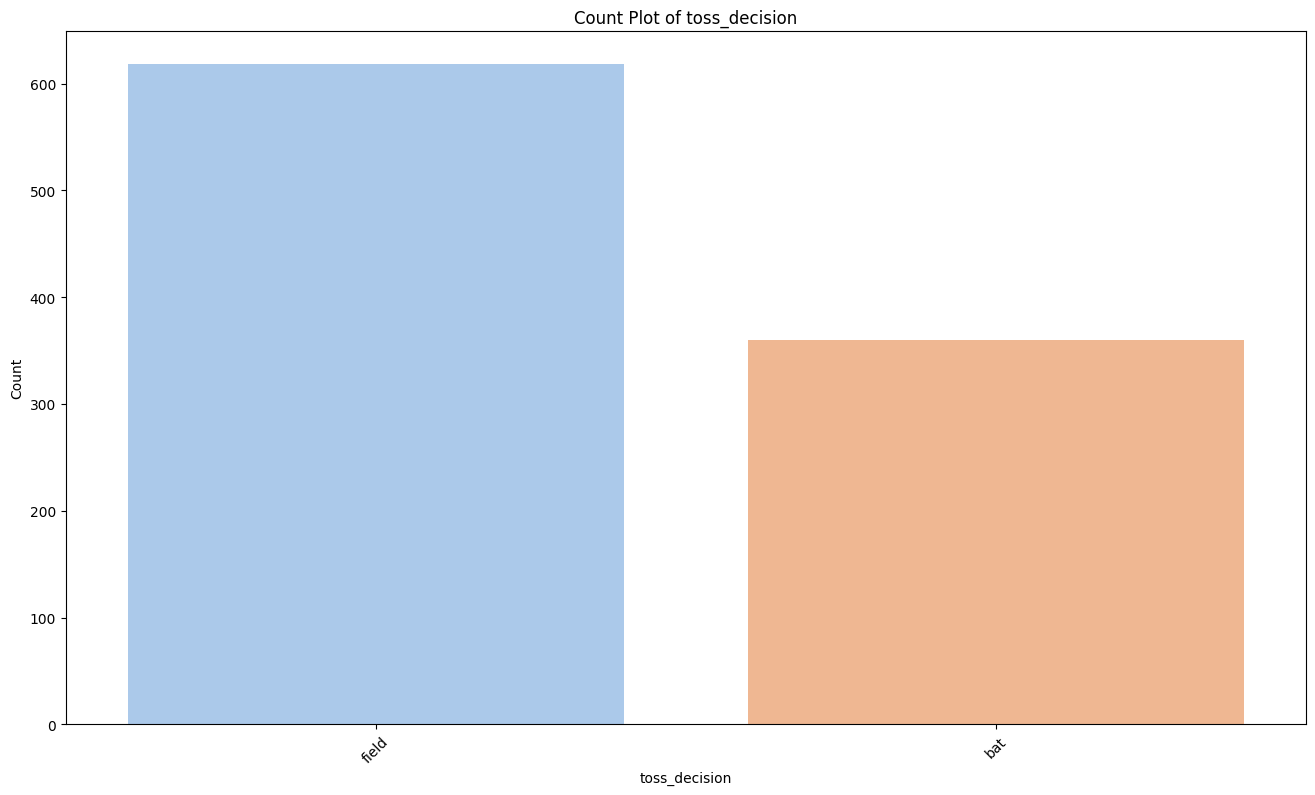

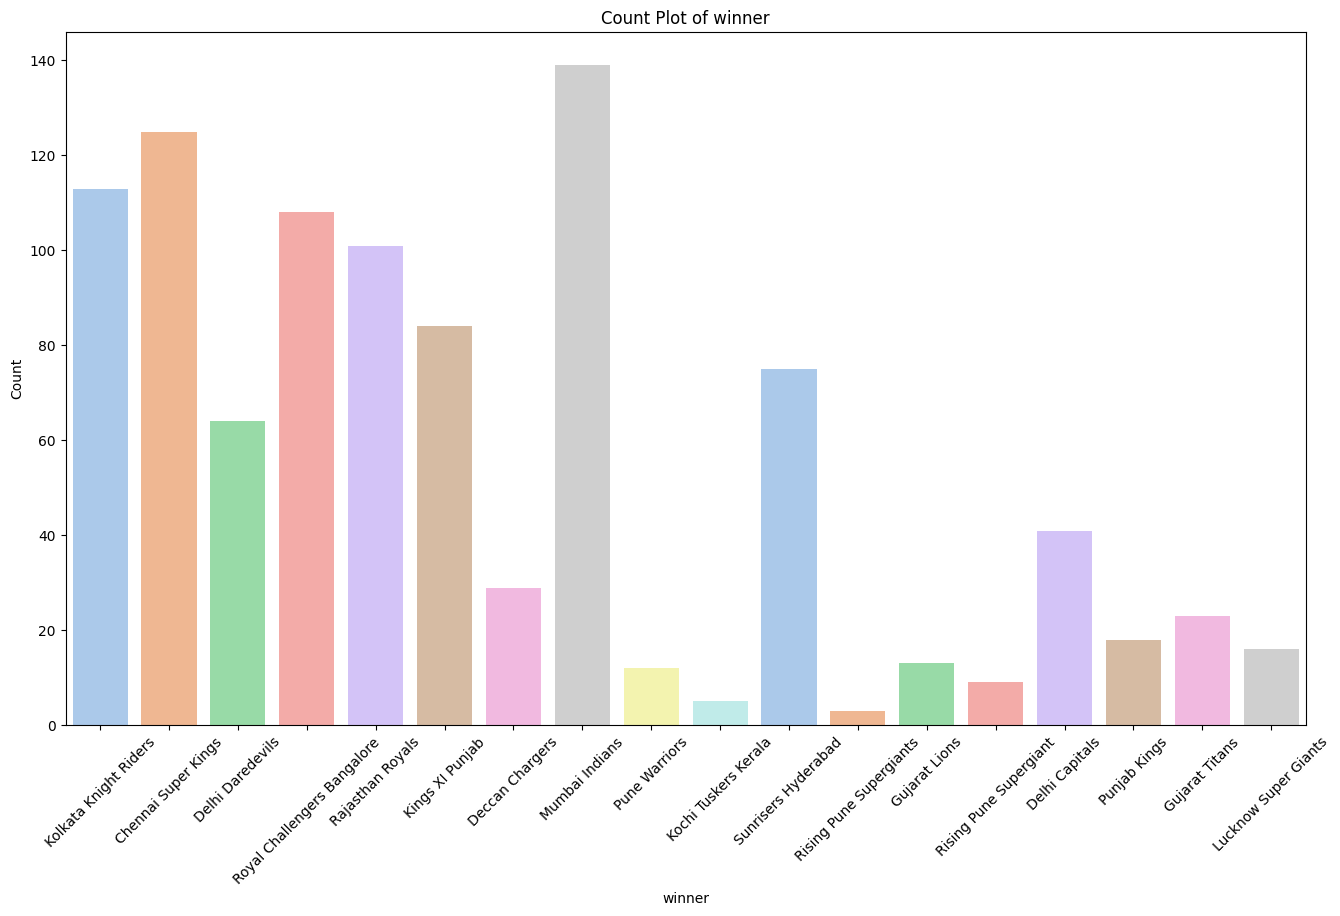

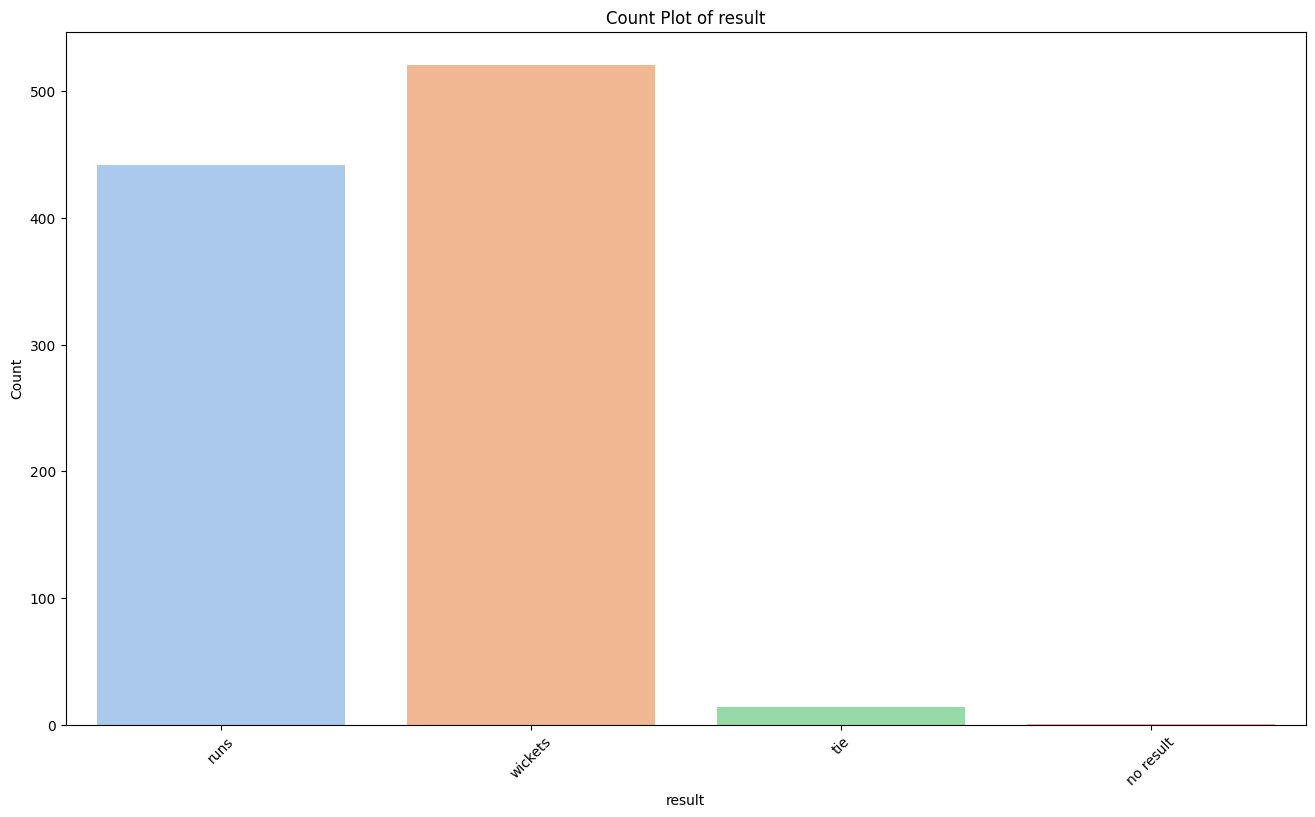

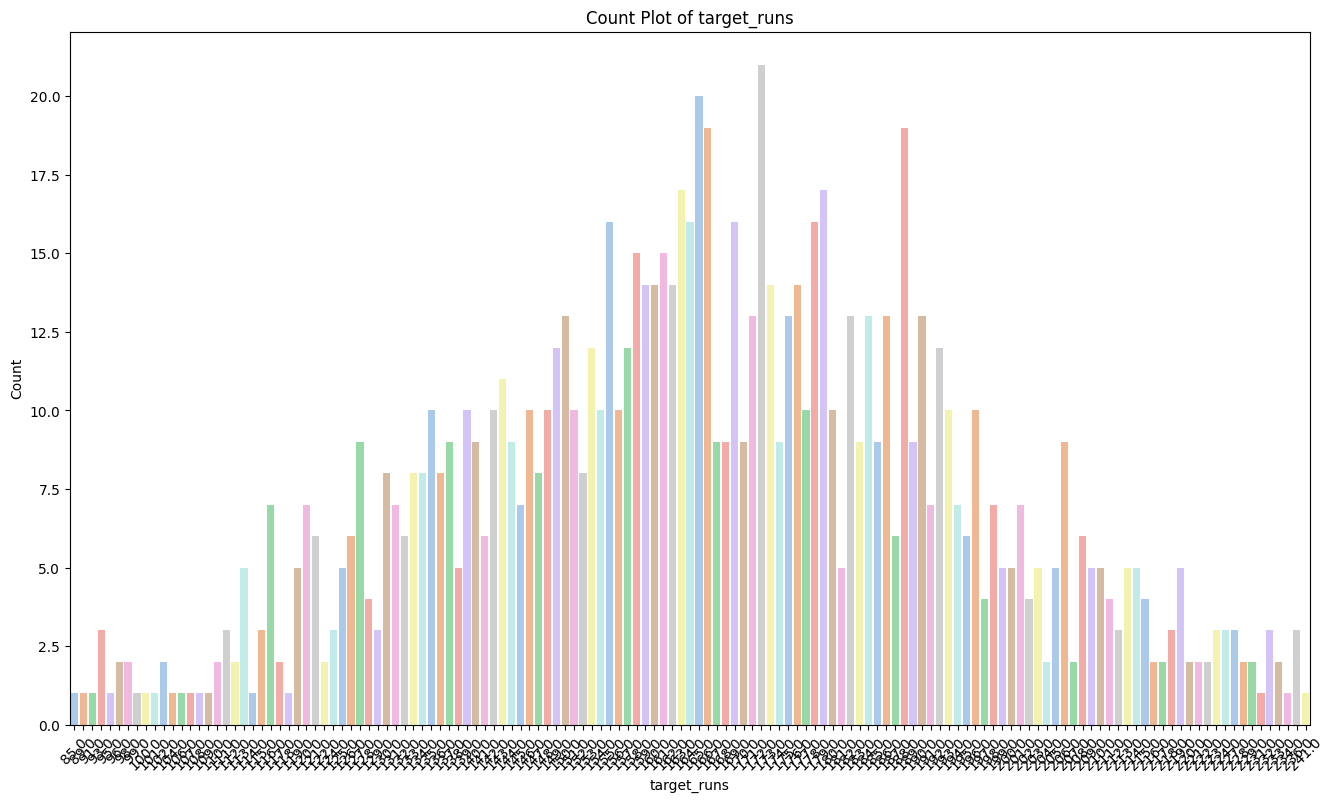

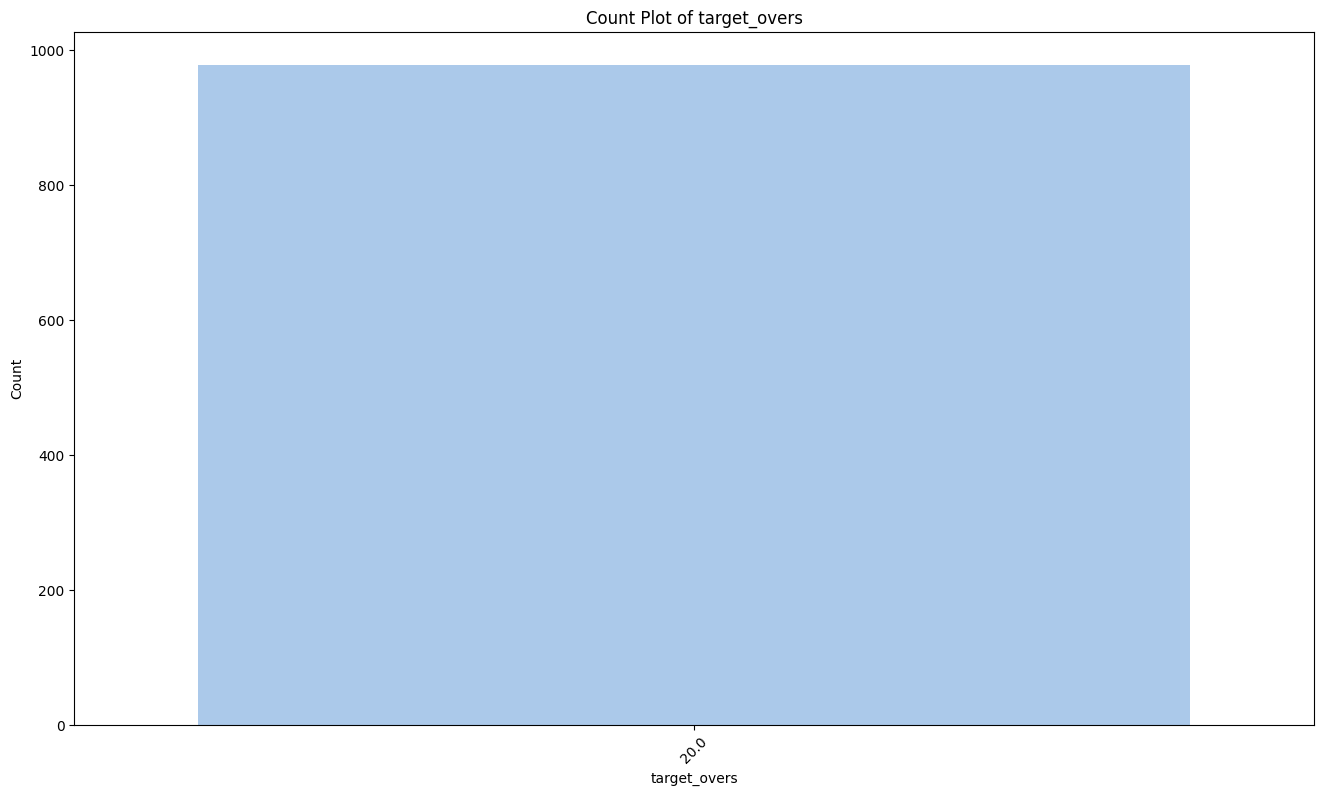

In [400]:
df = pd.DataFrame(df)

# Create count plot for each column
for column in df.columns:
    plt.figure(figsize=(16, 9))
    sns.countplot(data=df, x=column, palette='pastel')
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# LINE PLOT

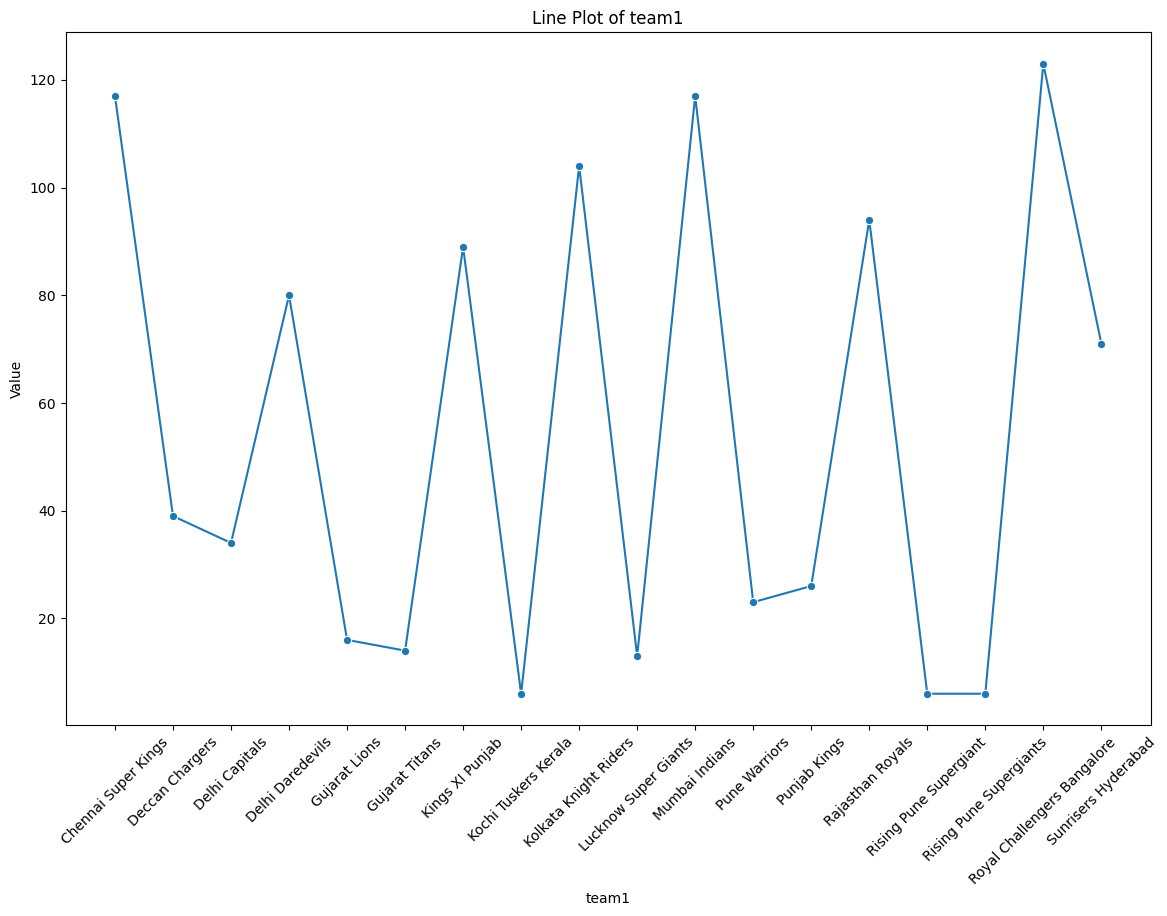

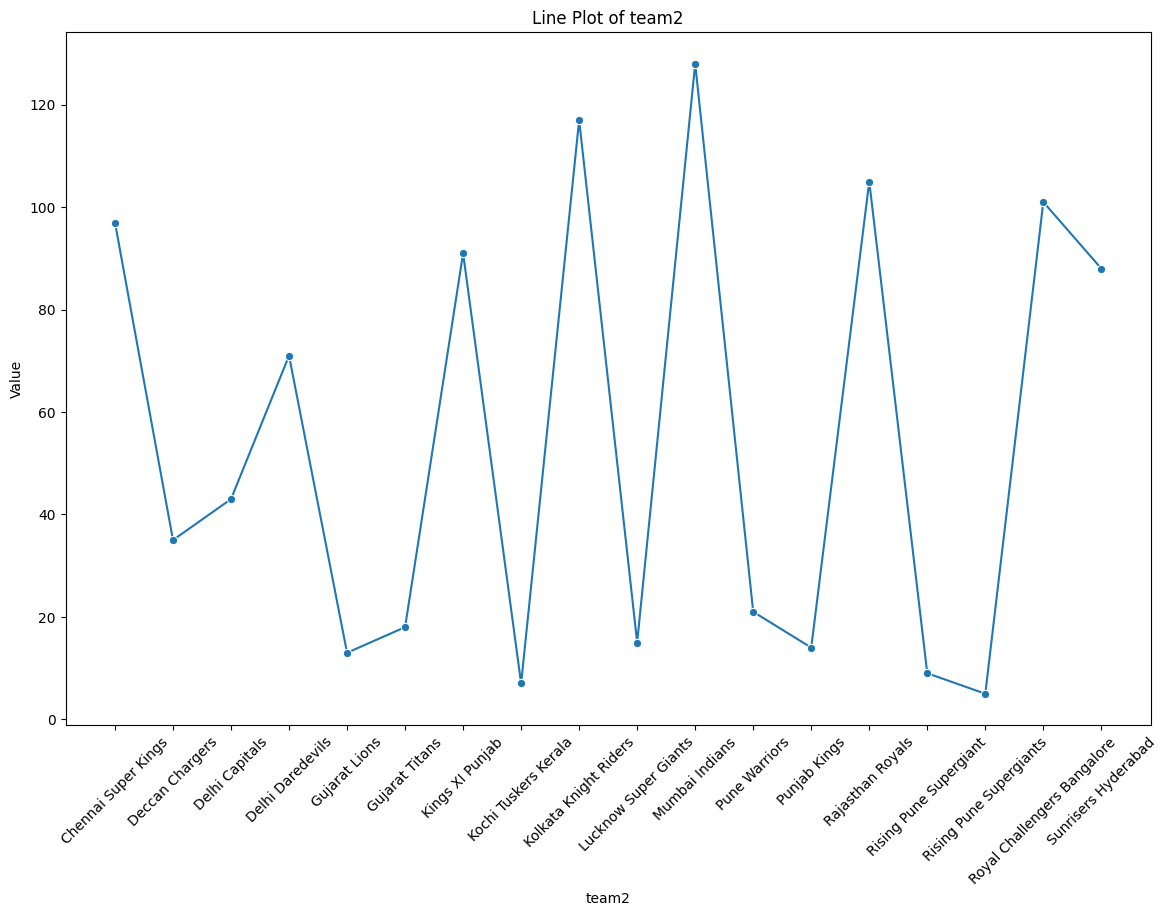

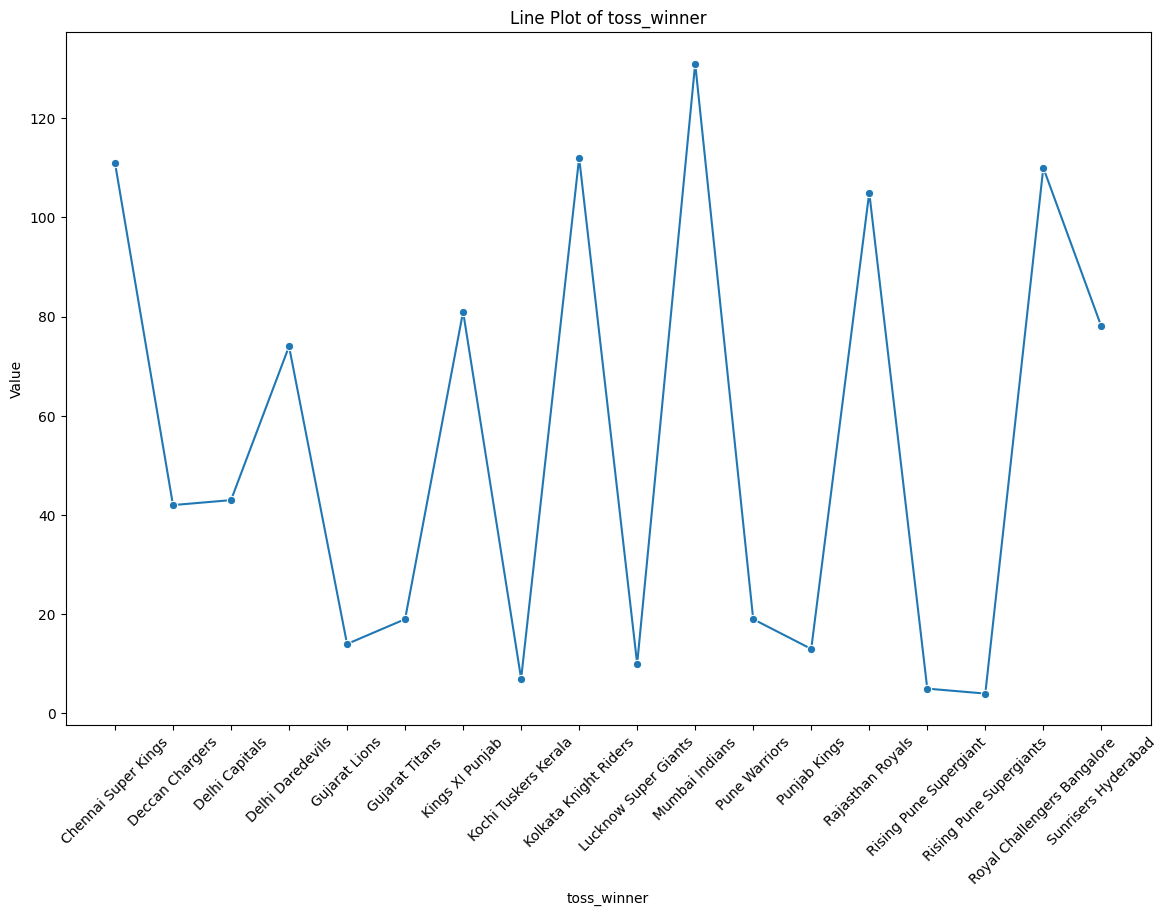

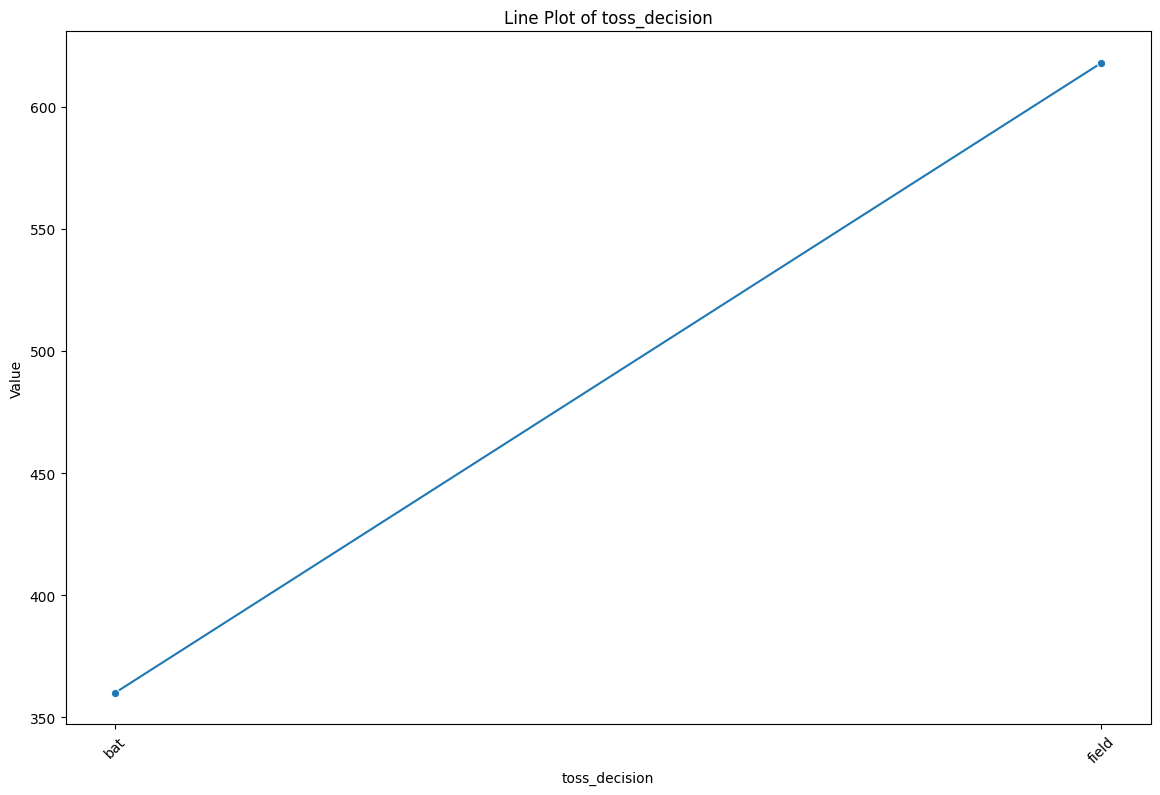

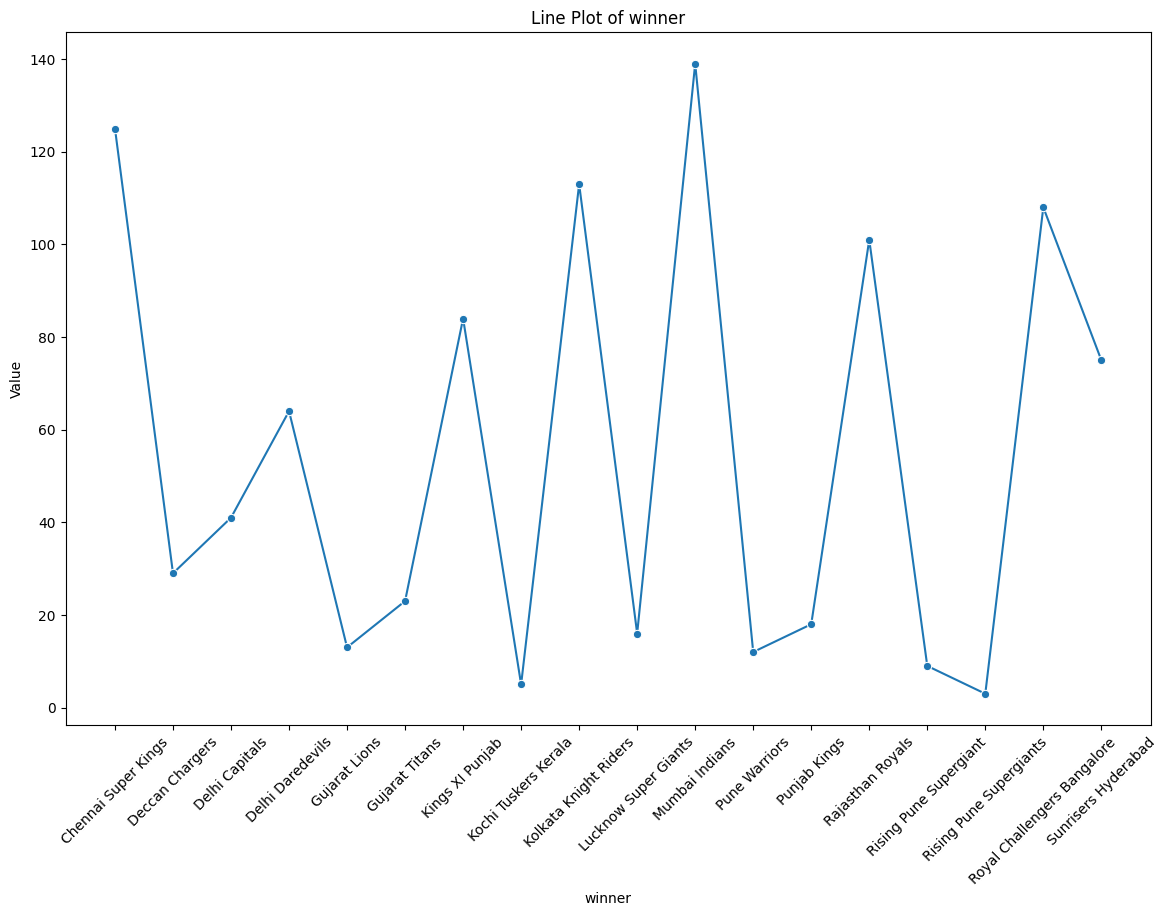

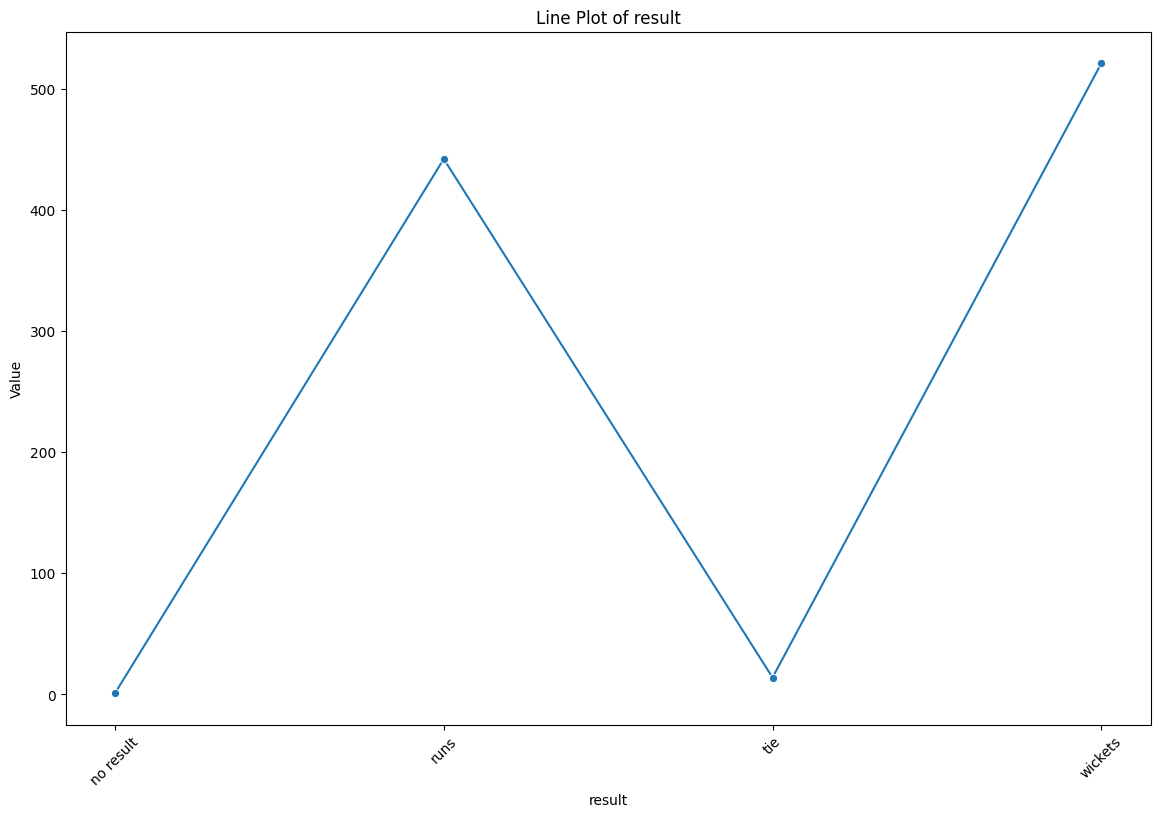

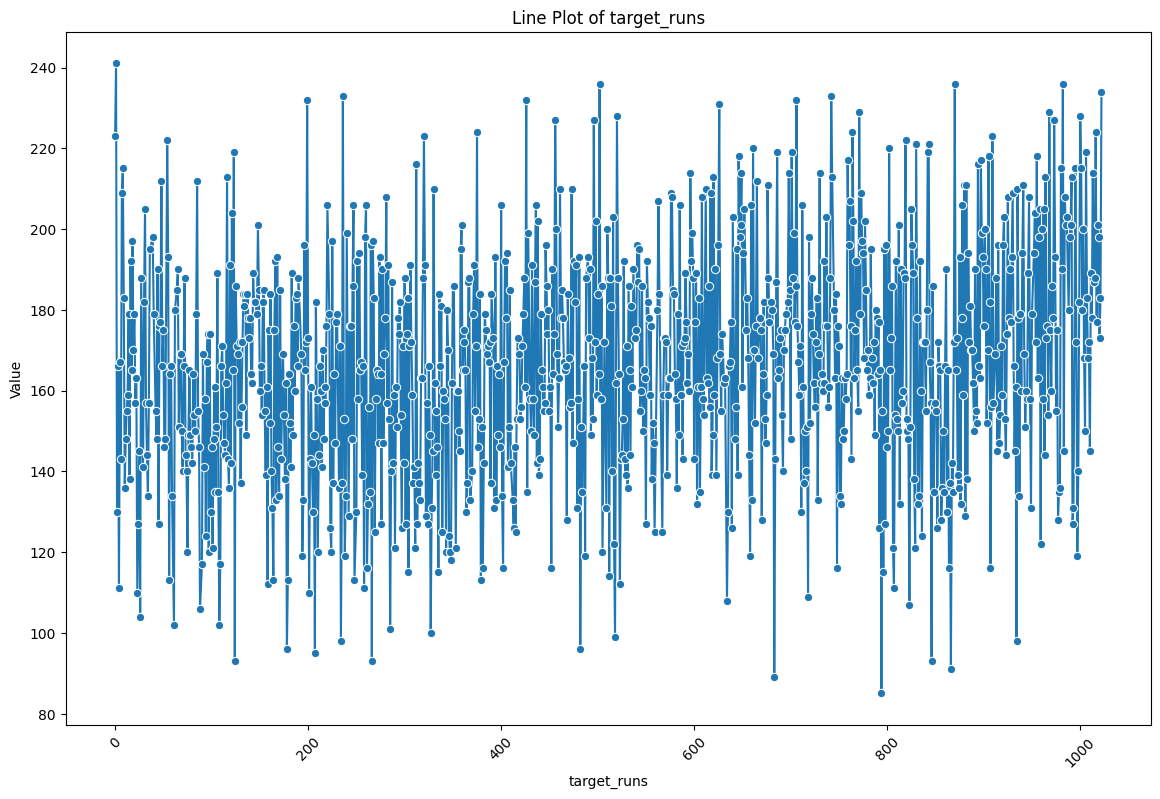

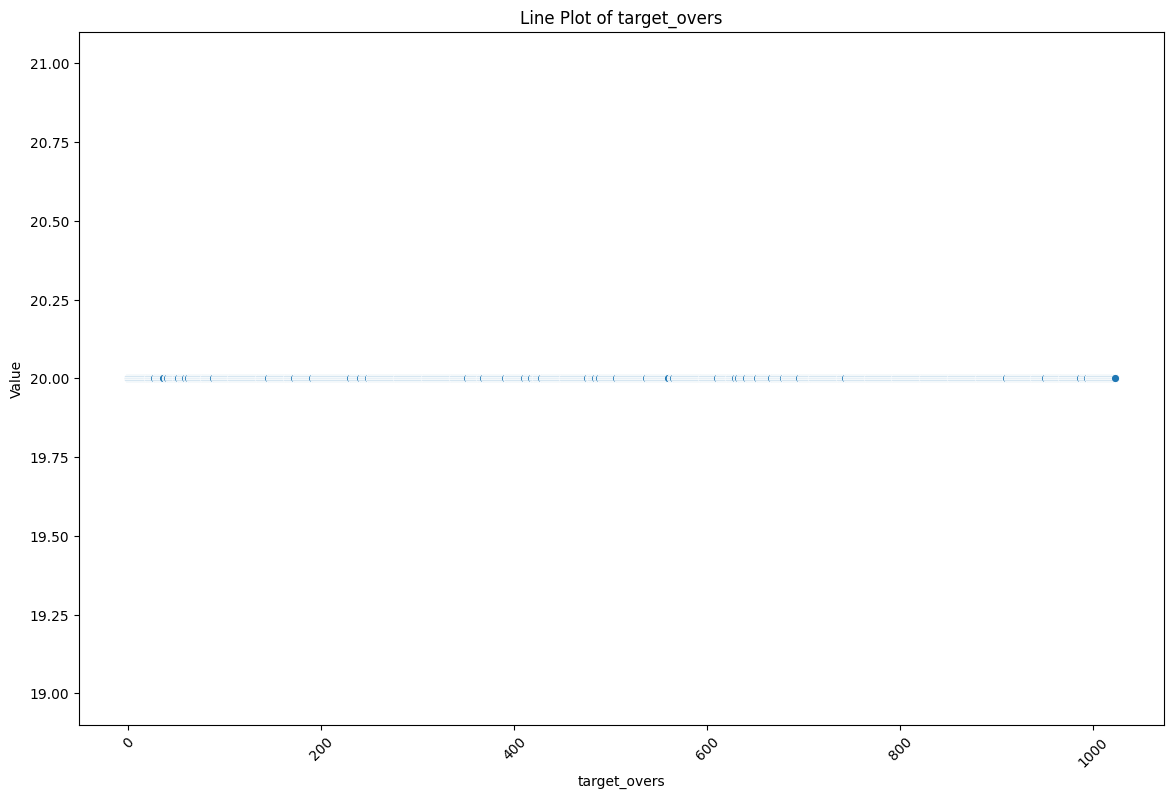

In [401]:
df = pd.DataFrame(df)

# Create line plot for each column
for column in df.columns:
    plt.figure(figsize=(14, 9))
    if df[column].dtype == 'object':  # Categorical column
        sns.lineplot(data=df.groupby(column).size().reset_index(name='count'), x=column, y='count', marker='o')
        plt.title(f'Line Plot of {column}')
    else:  # Numerical column
        sns.lineplot(data=df.reset_index(), x='index', y=column, marker='o')
        plt.title(f'Line Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()


# KDE PLOT

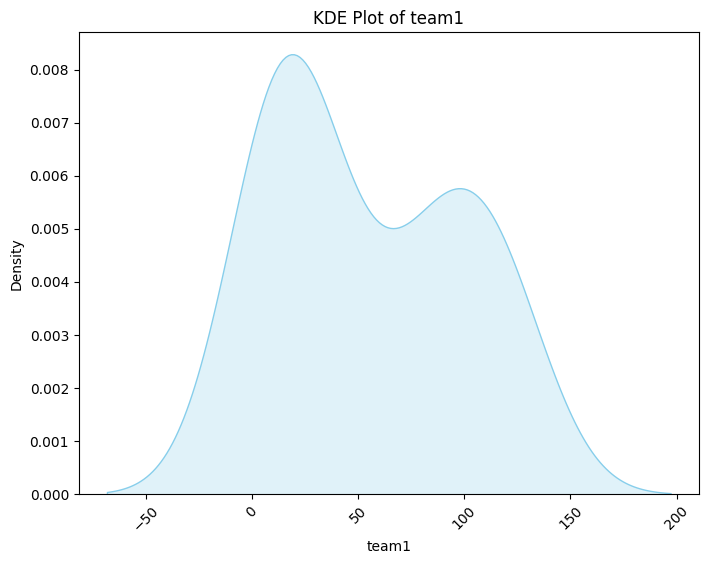

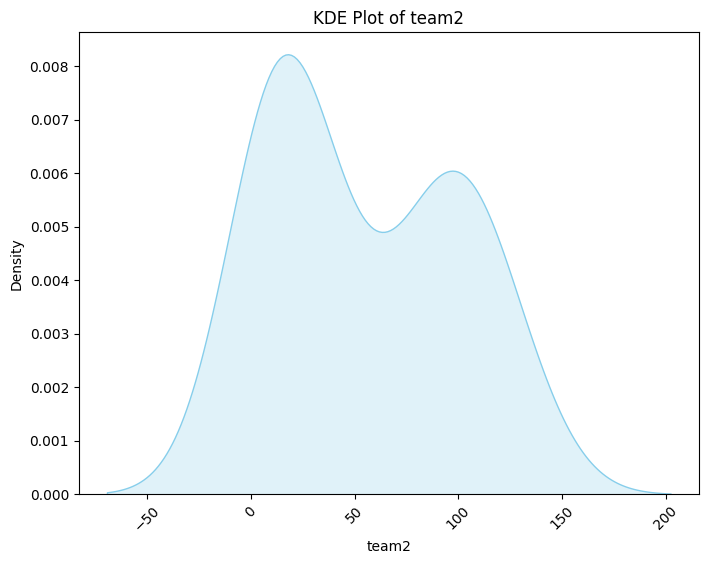

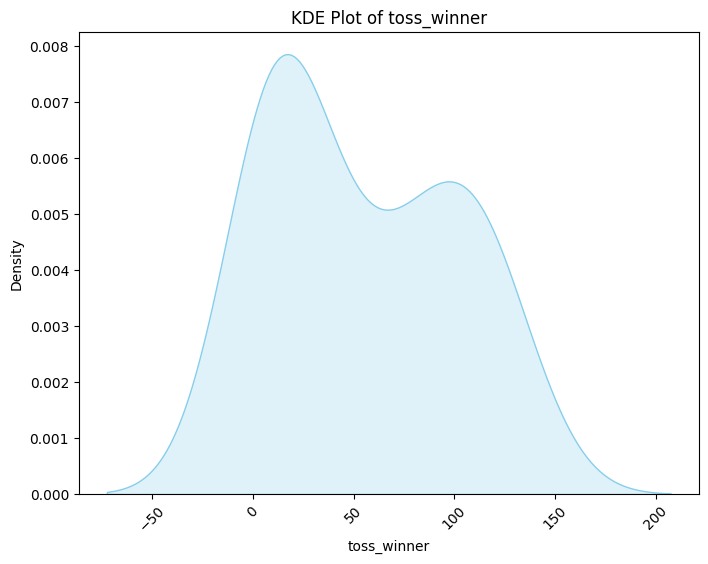

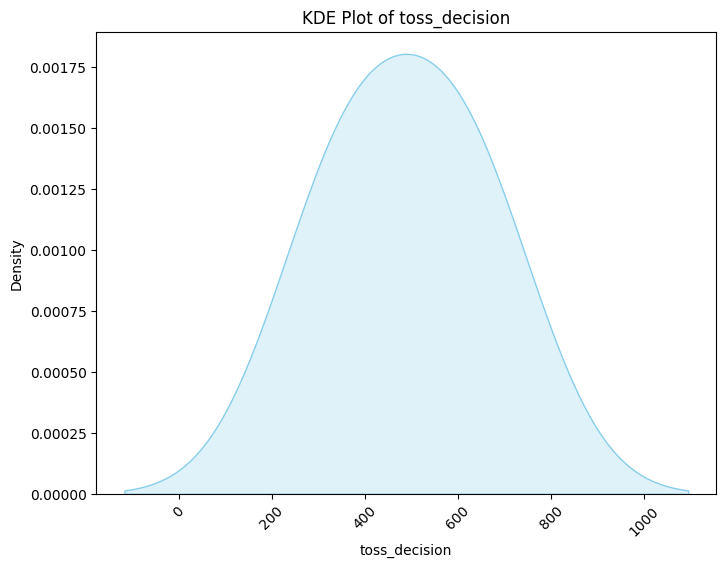

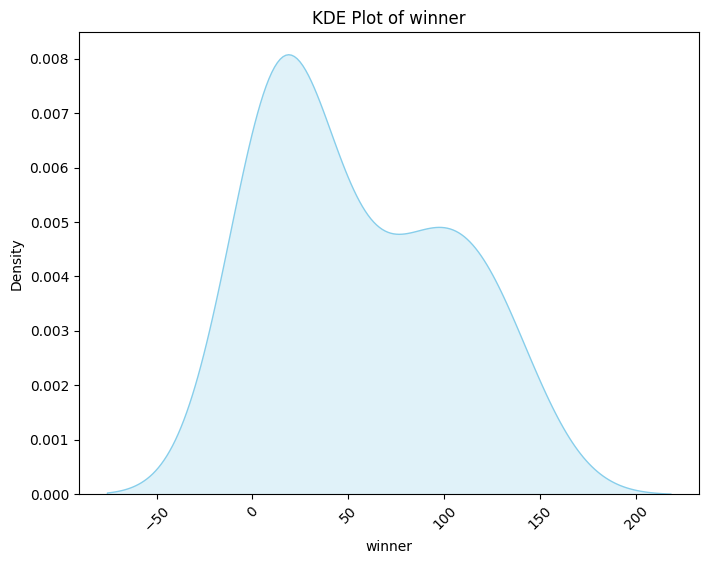

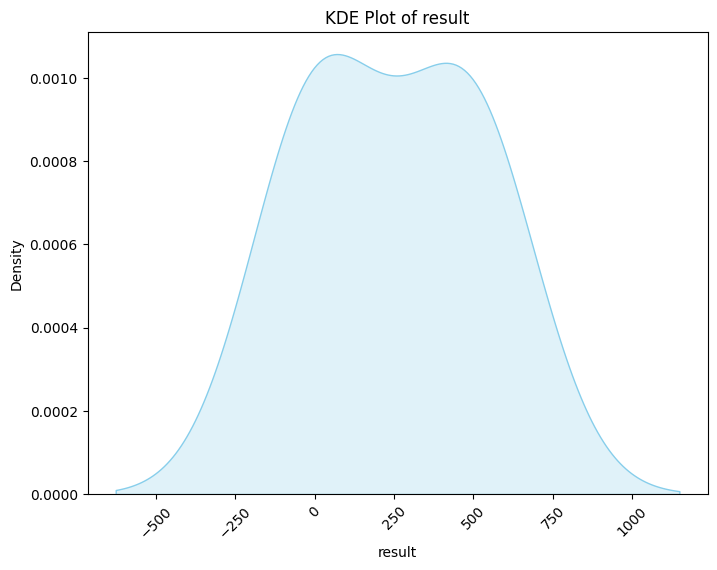

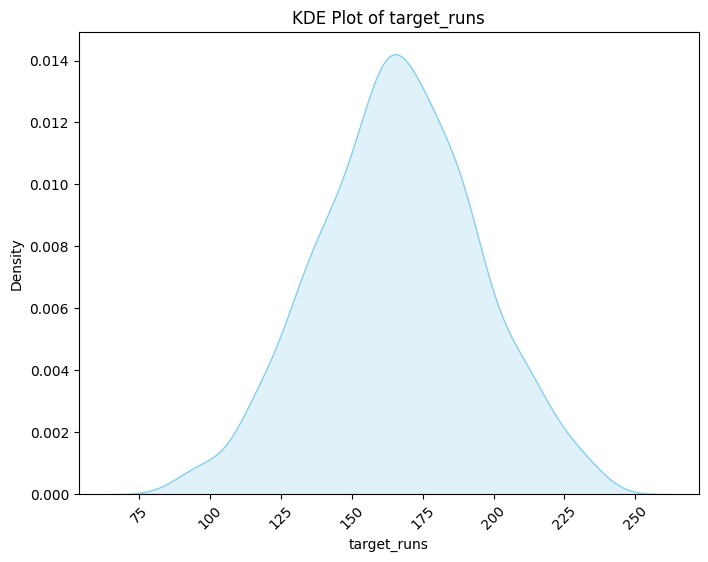

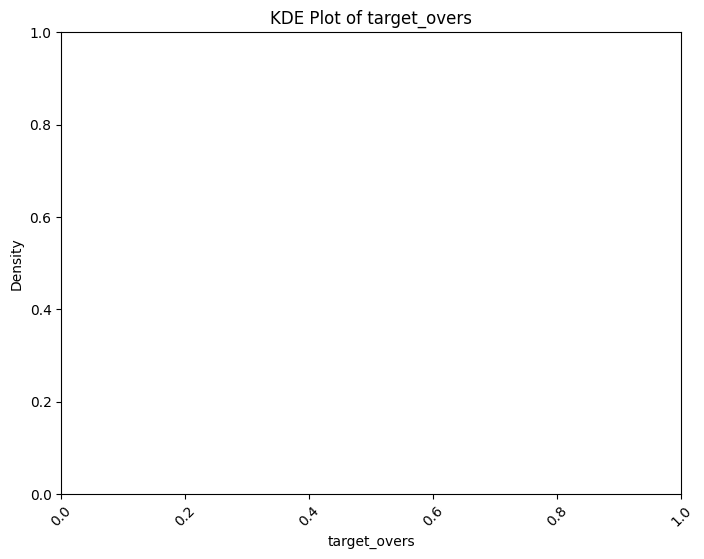

In [402]:
df = pd.DataFrame(df)

# Create KDE plot for each column
for column in df.columns:
    plt.figure(figsize=(8, 6))
    if df[column].dtype == 'object':  # Categorical column
        sns.kdeplot(data=df.groupby(column).size(), fill=True, color='skyblue')
        plt.title(f'KDE Plot of {column}')
    else:  # Numerical column
        sns.kdeplot(data=df[column], fill=True, color='skyblue')
        plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.xticks(rotation=45)
    plt.show()

# **Feature Engineering:**

In [403]:
#label encoding
from sklearn.preprocessing import LabelEncoder
#initialize labelEncoder()
label_encoder=LabelEncoder()

#apply tabel encoding to each categorical cpolumn
categorical_columns=df.select_dtypes(include=['object','category']).columns.tolist()
for columns in categorical_columns:
    df[columns]=label_encoder.fit_transform(df[columns])

#verify the encoded categorical columns
print(df.head())   #dispel the first few rows of the dataframe


   team1  team2  toss_winner  toss_decision  winner  result  target_runs  \
0     16      8           16              1       8       1        223.0   
1      6      0            0              0       0       1        241.0   
2      3     13           13              0       3       3        130.0   
3     10     16           10              0      16       3        166.0   
4      8      1            1              0       8       3        111.0   

   target_overs  
0          20.0  
1          20.0  
2          20.0  
3          20.0  
4          20.0  


In [404]:
import pandas as pd

# Assuming df is your DataFrame and it contains both numerical and categorical columns

# Select only the numerical columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Now you can proceed with plotting the heatmap using the correlation matrix


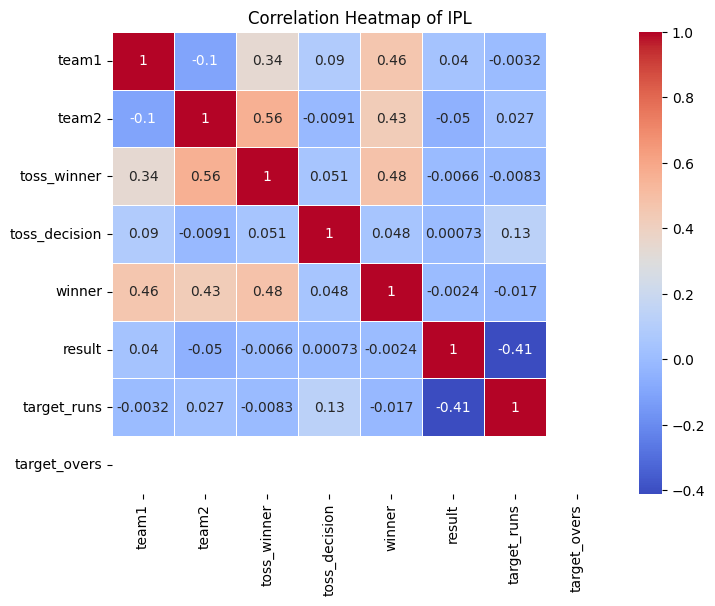

In [405]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of IPL')
plt.show()



# **Feature Selection:**


In [406]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['winner'])  # Features
y = df['winner']  # Target variable

print(X)

      team1  team2  toss_winner  toss_decision  result  target_runs  \
0        16      8           16              1       1        223.0   
1         6      0            0              0       1        241.0   
2         3     13           13              0       3        130.0   
3        10     16           10              0       3        166.0   
4         8      1            1              0       3        111.0   
...     ...    ...          ...            ...     ...          ...   
1018     17     10           10              1       3        201.0   
1019     16      5            5              1       3        198.0   
1020      0      5            5              1       1        173.0   
1021     10      9           10              0       1        183.0   
1022      5     10           10              1       1        234.0   

      target_overs  
0             20.0  
1             20.0  
2             20.0  
3             20.0  
4             20.0  
...            ...  


In [407]:
print(y)

0        8
1        0
2        3
3       16
4        8
        ..
1018    10
1019     5
1020     0
1021    10
1022     5
Name: winner, Length: 978, dtype: int32


# **Split Data into Training and Testing Sets:**


In [408]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [409]:
#Display the shapes of the training and testing sets
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (782, 7)
y_train shape (782,)
X_test shape (196, 7)
y_test shape (196,)


In [410]:

from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X_train, y_train)


In [411]:
# Get indices of selected features
selected_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_indices]

In [412]:
# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['team1', 'team2', 'toss_winner', 'toss_decision', 'result'], dtype='object')


# FEATURE SCALING

In [413]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


#  **Build the ML Model:**


In [414]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression




In [415]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [416]:
# Predict target values for the testing data
y_pred = model.predict(X_test_scaled)


In [417]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)


Mean Absolute Error (MAE): 3.5720126021043823
Mean Squared Error (MSE): 17.512227079542704
Root Mean Squared Error (RMSE): 4.184761293018122
R-squared: 0.4494732735730591


In [418]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6989795918367347


In [419]:
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report       # Import the classification_report function for detailed classification metrics
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn import svm                         
from sklearn.naive_bayes import GaussianNB            
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB            
from sklearn.neighbors import KNeighborsClassifier 

# Naive Bayes

In [420]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [421]:
naive_bayes.score(X_test,y_test)

0.17346938775510204

In [422]:
y_predict = naive_bayes.predict(X_test)

In [423]:
matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[22  0  0  1  0  0  0  1  0  0  0  0  0  0  1  6  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 2  0  0  0  1  0  0  0  0  0  0  0  0  0  1  3  1  0]
 [ 3  0  0  0  0  0  0  0  0  0  1  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0]
 [ 6  0  0  0  0  0  1  1  0  0  3  0  0  0  1  8  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0 10  0  0  3  0  0  0  0  8  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0  0]
 [ 3  0  0  1  0  0  0  2  0  0  5  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  0]
 [ 1  0  0  1  0  0  0  1  0  0  5  0  0  0  4  6  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  8  8  2  1]
 [ 1  0  0  0

In [424]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.69      0.56        32
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      0.05      0.09        21
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00         3
          10       0.24      0.19      0.21        26
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.29      0.10      0.14        21
    

# Support Vector Mechanism

In [425]:
svm_classifier = svm.SVC(kernel='linear') 

In [426]:
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [427]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2602040816326531


In [428]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Confusion Matrix:
[[25  0  0  0  0  0  1  2  0  0  0  0  4  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  2  2  0  1  0  0  1  0  0  0]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  1  1  0  7  0  0  3  0  1  0]
 [11  0  0  0  0  0  2  3  0  7  0  0  0  0  3  0]
 [ 1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  2  4  0  7  0  0  0  0  6  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  0  0  2  0]
 [ 3  0  0  1  0  0  0  5  0  4  0  0  1  0  5  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  4  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  2  0  5  0  0  0  0 11  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.78      0.50        32
           1       0.00      0.00

# KNN Classifier 

In [429]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [431]:
knn.score(X_test,y_test)

0.2653061224489796

In [432]:
y_predict = knn.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Confusion Matrix:
[[15  0  5  6  0  0  2  1  0  1  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0]
 [ 2  0  0  3  0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0]
 [ 3  1  1  3  0  1  2  6  0  1  0  0  0  0  3  0]
 [ 4  1  0  4  0  0  4  9  0  2  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 4  0  2  1  0  0  0  2  0 10  1  1  3  0  2  0]
 [ 0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  2  0  0  0]
 [ 2  1  2  1  1  0  2  0  0  6  0  0  2  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  5  1  3  0  0  1  0  9  2]
 [ 1  0  0  1  0  0  1  4  0  2  0  0  2  0  5  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.47      0.43        32
           1       0.00      0.00

# Random Forest Classifier

In [433]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=13)

In [434]:
random_forest.score(X_test,y_test)

0.6683673469387755

In [435]:
y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Confusion Matrix:
[[25  0  2  1  0  0  0  1  0  1  0  0  0  0  0  2]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  1  1  0  0  0  0  0  1  0  0  0]
 [ 1  0  0  5  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  2  0  2 10  2  0  1  0  1  1  0  0  0]
 [ 0  0  0  0  0  0  1 22  1  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0]
 [ 1  0  0  3  0  0  1  0  1 18  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  1  1  0  0  0]
 [ 1  1  1  1  0  0  1  1  0  2  0  0  8  1  2  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  4  0  0  1  0 14  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  2 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.50      0.50

#  Decision Tree

In [436]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [437]:
decision_tree.score(X_test,y_test)

0.5357142857142857

In [438]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)


report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Confusion Matrix:
[[21  0  1  1  0  0  1  0  0  0  3  0  0  0  0  0  3  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  5  1  0  0  0  0  0  0  1  0  0  1  0  0  0  0]
 [ 0  1  0  4  0  0  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  1  0  0  5  1  1  0  5  0  0  2  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  1  2 16  1  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  1  0  0  0  2  2 16  1  0  1  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 2  1  0  2  0  0  1  0  0  0  5  0  0  5  0  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  2  0  1  0  0  1  0  0 12  4]
 [ 1  0  0  0

In [439]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
